In [61]:
import requests
import base64
import json
from datetime import datetime, timedelta

# Replace these with your own credentials
client_id = '6de8a27421474b9180b4c22b6027b034'
client_secret = '01024a70b1f2428284b7767a6152602a'

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')

# Function to get the most played song genres from 5 years ago
def get_most_played_genres(access_token):
    api_url = 'https://api.spotify.com/v1/browse/categories'
    headers = {'Authorization': f'Bearer {access_token}'}
    five_years_ago = datetime.now() - timedelta(days=5*365)
    params = {'time_range': 'long_term', 'limit': 10, 'offset': 0, 'country': 'US'}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        categories = response.json()['categories']['items']
        most_played_genres = [category['name'] for category in categories]
        return most_played_genres
    else:
        raise Exception(f'Failed to get most played song genres. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)
    most_played_genres = get_most_played_genres(access_token)
    print("Most played song genres from 5 years ago:")
    for genre in most_played_genres:
        print(f"- {genre}")


Most played song genres from 5 years ago:
- Top Lists
- Hip-Hop
- Pop
- Country
- Latin
- Rock
- Summer
- Workout
- R&B
- Dance/Electronic


In [62]:

# Function to get the access token
def get_access_token(client_id, client_secret):
    auth_url = 'https://accounts.spotify.com/api/token'
    auth_header = base64.b64encode(f'{client_id}:{client_secret}'.encode('utf-8')).decode('utf-8')
    headers = {'Authorization': f'Basic {auth_header}'}
    data = {'grant_type': 'client_credentials'}

    response = requests.post(auth_url, headers=headers, data=data)
    if response.status_code == 200:
        return response.json()['access_token']
    else:
        raise Exception(f'Failed to get access token. Status code: {response.status_code}')
# Function to search for artists
def search_artists(access_token, query, limit=50):
    api_url = 'https://api.spotify.com/v1/search'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'q': query, 'type': 'artist', 'limit': limit}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        artists = response.json()['artists']['items']
        return artists
    else:
        raise Exception(f'Failed to search for artists. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Search for artists 
    artists = search_artists(access_token, 'pop')

    # Get artist names and popularity scores
    artist_popularity = [(artist['name'], artist['popularity']) for artist in artists]

    # Sort artists by popularity and get the top 20
    top_20_artists = sorted(artist_popularity, key=lambda x: x[1], reverse=True)[:20]

    # Print the top 20 artists
    print("Top 20 artists:")
    for idx, (name, popularity) in enumerate(top_20_artists, 1):
        print(f"{idx}. {name} (Popularity: {popularity})")


Top 20 artists:
1. The Weeknd (Popularity: 98)
2. Miley Cyrus (Popularity: 93)
3. Rihanna (Popularity: 93)
4. Ariana Grande (Popularity: 92)
5. Ed Sheeran (Popularity: 92)
6. Harry Styles (Popularity: 91)
7. Lady Gaga (Popularity: 88)
8. Katy Perry (Popularity: 86)
9. Pop Smoke (Popularity: 84)
10. Paramore (Popularity: 82)
11. Fall Out Boy (Popularity: 81)
12. My Chemical Romance (Popularity: 79)
13. All Time Low (Popularity: 73)
14. Popcaan (Popularity: 69)
15. Icona Pop (Popularity: 68)
16. The Wanted (Popularity: 66)
17. Poppy (Popularity: 61)
18. Pop Evil (Popularity: 61)
19. Poppy Baskcomb (Popularity: 60)
20. Pop Mage (Popularity: 57)


In [63]:
import pandas as pd

# Create a DataFrame from the top 20 artists list
top_20_artists_df = pd.DataFrame(top_20_artists, columns=['Artist', 'Popularity'])

# Print the DataFrame
print(top_20_artists_df)


                 Artist  Popularity
0            The Weeknd          98
1           Miley Cyrus          93
2               Rihanna          93
3         Ariana Grande          92
4            Ed Sheeran          92
5          Harry Styles          91
6             Lady Gaga          88
7            Katy Perry          86
8             Pop Smoke          84
9              Paramore          82
10         Fall Out Boy          81
11  My Chemical Romance          79
12         All Time Low          73
13              Popcaan          69
14            Icona Pop          68
15           The Wanted          66
16                Poppy          61
17             Pop Evil          61
18       Poppy Baskcomb          60
19             Pop Mage          57


In [64]:
# Wrong, as it extracted the artist id from the first artist in the list, not the first artist in the top 20 list
# Function to get an artist's follower count
def get_artist_follower_count(access_token, artist_id):
    api_url = f'https://api.spotify.com/v1/artists/{artist_id}'
    headers = {'Authorization': f'Bearer {access_token}'}

    response = requests.get(api_url, headers=headers)
    if response.status_code == 200:
        return response.json()['followers']['total']
    else:
        raise Exception(f'Failed to get follower count for artist {artist_id}. Status code: {response.status_code}')

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Get the artist IDs from the original artists list
    artist_ids = [artist['id'] for artist in artists]

    # Get the follower counts for the top 20 artists
    follower_counts = [get_artist_follower_count(access_token, artist_id) for artist_id in artist_ids]

    # Add the "Followers" column to the DataFrame
    top_20_artists_df['Followers'] = follower_counts[:20]

    # Print the updated DataFrame
    print(top_20_artists_df)



                 Artist  Popularity  Followers
0            The Weeknd          98   12226891
1           Miley Cyrus          93       5654
2               Rihanna          93     888360
3         Ariana Grande          92    1231957
4            Ed Sheeran          92        257
5          Harry Styles          91     512269
6             Lady Gaga          88       5038
7            Katy Perry          86      64905
8             Pop Smoke          84      26849
9              Paramore          82        408
10         Fall Out Boy          81       2864
11  My Chemical Romance          79   88917092
12         All Time Low          73        101
13              Popcaan          69      21426
14            Icona Pop          68   20140407
15           The Wanted          66          0
16                Poppy          61       6380
17             Pop Evil          61    7510358
18       Poppy Baskcomb          60      10823
19             Pop Mage          57      60353


This ^ is Wrong, as the code extracted the artist id from the first artists in the iteration, not the first artists in the top 20 list, so the followers count did not correspond. Below it's the updated version in which I add a Followers column to the popularity dataframe

In [76]:
# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Create a dictionary to store artist IDs and their corresponding names, popularity scores, and follower counts
    artist_id_map = {artist['id']: (artist['name'], artist['popularity'], artist['followers']['total']) for artist in artists}

    # Sort the dictionary by popularity and select the top 20 artists
    sorted_artist_id_map = dict(sorted(artist_id_map.items(), key=lambda item: item[1][1], reverse=True)[:20])

    # Create a new DataFrame with the updated data
    updated_top_20_artists_df = pd.DataFrame(sorted_artist_id_map.values(), columns=['Artist', 'Popularity', 'Followers'])

    # Print the updated DataFrame
    print(updated_top_20_artists_df)


                 Artist  Popularity  Followers
0            The Weeknd          98   61407159
1           Miley Cyrus          93   20140407
2               Rihanna          93   53928858
3         Ariana Grande          92   88917092
4            Ed Sheeran          92  110663355
5          Harry Styles          91   26710666
6             Lady Gaga          88   25701963
7            Katy Perry          86   25943897
8             Pop Smoke          84   12226891
9              Paramore          82    7648694
10         Fall Out Boy          81    9893880
11  My Chemical Romance          79    7510358
12         All Time Low          73    2915998
13              Popcaan          69     888360
14            Icona Pop          68     695787
15           The Wanted          66    2605871
16                Poppy          61    1231957
17             Pop Evil          61     512269
18       Poppy Baskcomb          60       2864
19             Pop Mage          57       2134


In [79]:
# Got rid of 2 weird outliers
updated_top_20_artists_df = updated_top_20_artists_df[:-2]
updated_top_20_artists_df

,Artist,Popularity,Followers
0,The Weeknd,98,61407159
1,Miley Cyrus,93,20140407
2,Rihanna,93,53928858
3,Ariana Grande,92,88917092
4,Ed Sheeran,92,110663355
5,Harry Styles,91,26710666
6,Lady Gaga,88,25701963
7,Katy Perry,86,25943897
8,Pop Smoke,84,12226891
9,Paramore,82,7648694


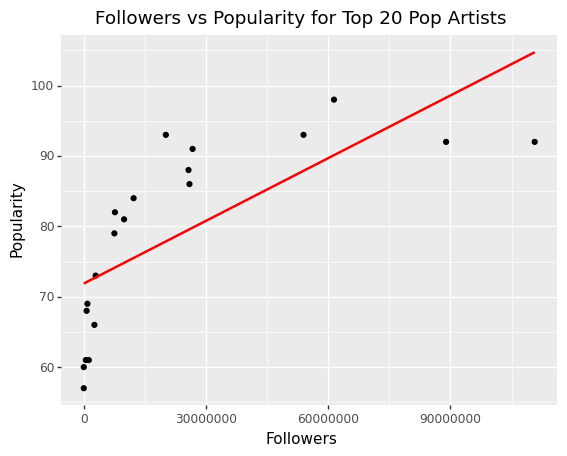

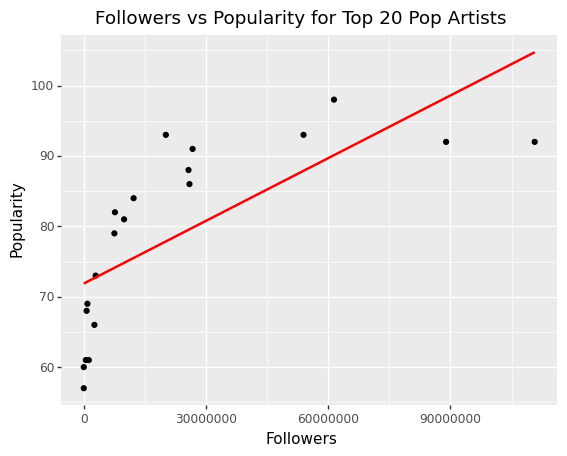

In [74]:
import pandas as pd
import  numpy as np
np.float=float
np.int=int
np.object=object
np.bool=bool
from plotnine import ggplot, aes, geom_point, geom_smooth, labs

# Create a scatter plot using the DataFrame columns
plot = (
    ggplot(updated_top_20_artists_df, aes(x='Followers', y='Popularity'))
    + geom_point()
    + geom_smooth(method='lm', color='red', se=False)
    + labs(x='Followers', y='Popularity', title='Followers vs Popularity for Top 20 Pop Artists')
)

# Display the plot
plot.draw()


In [68]:
# Now I am trying to see what artists are viral in given countries
# Function to get the top playlists for a given country
def get_top_playlists(access_token, country):
    api_url = 'https://api.spotify.com/v1/browse/featured-playlists'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'country': country, 'limit': 50}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        playlists = response.json()['playlists']['items']
        return playlists
    else:
        raise Exception(f'Failed to get top playlists for {country}. Status code: {response.status_code}')

# Function to get the tracks from a given playlist
def get_playlist_tracks(access_token, playlist_id):
    api_url = f'https://api.spotify.com/v1/playlists/{playlist_id}/tracks'
    headers = {'Authorization': f'Bearer {access_token}'}
    params = {'limit': 100}

    response = requests.get(api_url, headers=headers, params=params)
    if response.status_code == 200:
        tracks = response.json()['items']
        return tracks
    else:
        raise Exception(f'Failed to get tracks for playlist {playlist_id}. Status code: {response.status_code}')

# List of country codes
countries = ['US', 'GB', 'DE', 'FR', 'CA', 'AU', 'JP', 'BR', 'MX', 'IT', 'ES']

# Dictionary to store artist counts per country
artist_counts = {}

# Main program
if __name__ == "__main__":
    access_token = get_access_token(client_id, client_secret)

    # Iterate through the countries
    for country in countries:
        artist_counts[country] = {}

        # Get the top 50 playlists for the country
        playlists = get_top_playlists(access_token, country)

        # Iterate through the playlists
        for playlist in playlists:
            playlist_id = playlist['id']

            # Get the tracks from the playlist
            tracks = get_playlist_tracks(access_token, playlist_id)
            
            # Iterate through the tracks
            for track in tracks:
                if track['track'] is not None:
                    artist = track['track']['artists'][0]['name']

                    # Increment artist count
                    if artist in artist_counts[country]:
                        artist_counts[country][artist] += 1
                    else:
                        artist_counts[country][artist] = 1
  #Make a dataframe containing all tracks, artists, countries and counts in descending order
    all_tracks = []
    for country in countries:
        for artist in artist_counts[country]:
            all_tracks.append([country, artist, artist_counts[country][artist]])
    all_tracks_df = pd.DataFrame(all_tracks, columns=['Country', 'Artist', 'Count'])
    all_tracks_df = all_tracks_df.sort_values(by='Count', ascending=False)
    print(all_tracks_df)
    
    # One more dataframe with top 20 artists across all countries
    top_20_artists = all_tracks_df.groupby('Artist').sum().sort_values(by='Count', ascending=False)[:20]
    print(top_20_artists)



     Country             Artist  Count
4119      AU              AC/DC     16
4492      JP             Vaundy     15
4176      AU        Tame Impala     15
5396      BR  Pineapple StormTv     14
4466      JP       Taylor Swift     12
...      ...                ...    ...
2819      CA               FOMO      1
2818      CA              ROSSY      1
2817      CA             Greeko      1
2816      CA        Torren Foot      1
7471      ES      Celtas Cortos      1

[7472 rows x 3 columns]
                 Count
Artist                
Taylor Swift        50
The Weeknd          35
Ed Sheeran          33
SZA                 30
Harry Styles        29
Rihanna             25
Miley Cyrus         25
Tame Impala         24
Sam Smith           24
Tiësto              23
David Guetta        23
Drake               22
Gorillaz            21
Coldplay            21
Calvin Harris       20
Lizzy McAlpine      20
Elton John          18
Metro Boomin        18
Imagine Dragons     18
AC/DC               17


<ipython-input-68-caa46d51215e>:71: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


In [69]:
top_20_artists[:10]

,Count
Artist,
Taylor Swift,50
The Weeknd,35
Ed Sheeran,33
SZA,30
Harry Styles,29
Rihanna,25
Miley Cyrus,25
Tame Impala,24
Sam Smith,24


In [70]:
# Just wanted to continue on Jacen's proposal, to see if who 3 years ago the top 50 artists were
import billboard
import datetime

# Function to get the top 50 artists from the Billboard Hot 100 chart 3 years ago
def get_top_artists_from_billboard(date):
    chart = billboard.ChartData('hot-100', date=date)
    top_artists = [entry.artist for entry in chart[:50]]
    return top_artists

# Calculate the date 3 years ago
three_years_ago = (datetime.datetime.now() - datetime.timedelta(days=3*365)).strftime('%Y-%m-%d')

# Get the top 50 artists from the Billboard Hot 100 chart 3 years ago
top_artists = get_top_artists_from_billboard(three_years_ago)

# Print the top 50 artists
print(f"Top 50 artists from the Billboard Hot 100 chart on {three_years_ago}:")
for idx, artist in enumerate(top_artists, 1):
    print(f"{idx}. {artist}")


Top 50 artists from the Billboard Hot 100 chart on 2020-03-26:
1. Roddy Ricch
2. The Weeknd
3. Dua Lipa
4. Future Featuring Drake
5. Post Malone
6. Arizona Zervas
7. Harry Styles
8. Justin Bieber Featuring Quavo
9. Lewis Capaldi
10. Billie Eilish
11. blackbear
12. Maroon 5
13. Lil Uzi Vert
14. Doja Cat Featuring Nicki Minaj
15. Tones And I
16. The Weeknd
17. Maren Morris
18. Camila Cabello Featuring DaBaby
19. Lil Uzi Vert Featuring Chief Keef
20. YNW Melly & Juice WRLD
21. Mustard & Roddy Ricch
22. Dan + Shay & Justin Bieber
23. Eminem Featuring Juice WRLD
24. DaBaby
25. Lady Gaga
26. Lil Uzi Vert & 21 Savage
27. Lil Uzi Vert
28. Lil Baby
29. Trevor Daniel
30. Black Eyed Peas X J Balvin
31. Selena Gomez
32. Chris Brown Featuring Drake
33. Roddy Ricch Featuring Mustard
34. Halsey
35. Kane Brown
36. Gabby Barrett Featuring Charlie Puth
37. Lil Uzi Vert
38. Lil Mosey
39. Jake Owen
40. Rod Wave
41. Lil Uzi Vert
42. Lil Uzi Vert
43. Demi Lovato
44. Lizzo
45. Lil Uzi Vert
46. Russ & BIA
47.